# Probability Density Function (PDF)
- PDF is a mathematical function that describes the probability distribution of a continuous random variable

### Why probability Density why not probability?
- For any continuous random variable, as in PMF (which is distribution function for discrete random variables) plotting a value vs probability is almost impossible
- It is because picking any continuous range of number will have infinite numbers between them.
- For example between 1 to 10, there are infinite continuous numbers also in between 0 and 1 there are infinite numbers
- So, picking any numbers between continuous range and calculating it's probability will result in very small number i.e almost zero
- For example, between 0 and 1, the probability of getting 0.431234451 will be zero
- For the reason, the y-axis of any probability density functions plot does not actually show the probability itself rather it is a probability density.

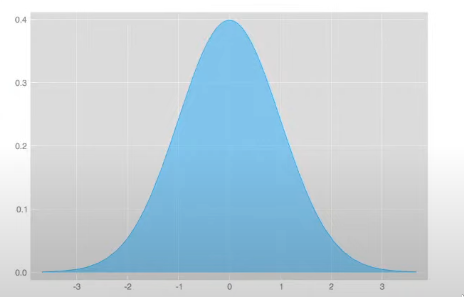

### What does the area under the curve represent?
- The area under the curve formed by pdf reperesents the total probability of the outcome i.e 1

### How to know the probability of an outcome from the curve?
- The probability of getting a value between 1 and 2 is given by the area under the curve between 1 and 2
- The area under the curve between 1 and 2 can be calculated as:
$$ P(1\le x \le 2) = \int_1^2 f(x)\ dx$$
- Generalizing the formula to find the probability;
$$ P(a\le x \le b) = \int_a^b f(x)\ dx $$

# Density Estimation
- It is a technique used to the probability density function (pdf) of a random variable based on set of observations or data.
- In other words, it involves estimation of underlying distribution of a set of data points.
#### Application of Density Estimation
- Hypothesis testing, data analysis, data visualization, in ML to estimate distribution of input data.

## Approaches for density estimation
1. Parametric
- Parametric density estimation techinique assumes that the data follows certain probability distribution(such as normal distribution, poisson distribution etc.)
- The parametric density estimate does not use the data points rather it uses the summary of that data set (for normal distribution it uses mean and standard deviation).
- Example; Gaussian Mixture Model (used for clustering data assuming data is in gaussian distribution)

2. Non-parametric
- The non-parametric technique does not make any assumptions about the distribution instead estimate it directly from the data
- Unlike parametric density estimation, the non-parametric model uses each data points and apply the kernel function to calculate the density on each point.
- The drawback of non-parametric density estimation is that it is computationally expensive and requires more data to achieve accurate estimates
- Most popular kernel fucntion is Gaussian kernel function.
- Example; KDE (Kernel Density Estimate), histogram estimation

# Parametric Density Estimation
- Generating a random sample and assuming it to be normally distributed

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
sample = np.random.normal(loc= 200, scale = 60, size = 1000)

In [3]:
pd.Series(sample).describe()

count    1000.000000
mean      201.426283
std        60.540448
min        33.821005
25%       158.324632
50%       199.259981
75%       241.858979
max       423.139347
dtype: float64

In [4]:
sample_mean = sample.mean()
sample_std = sample.std()

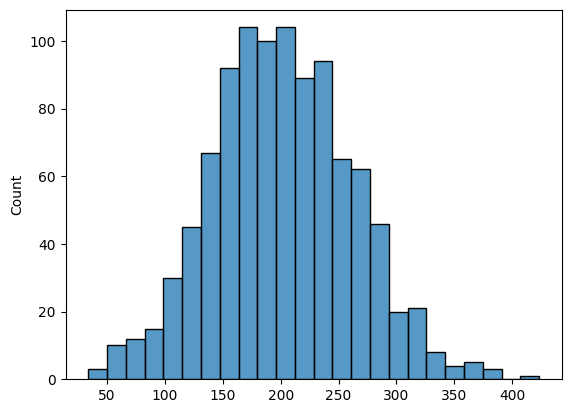

In [5]:
sns.histplot(data = sample);

In [6]:
dist = sp.stats.norm(sample_mean, sample_std)

- `scipy.stats.norm()` creates a fit for the normal distibution with the parameters $\mu$ and $\sigma$
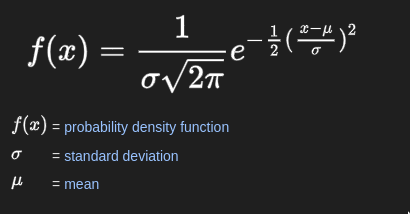

In [7]:
# for the x in the formula we create a random values ranging from min to max of the random sample
values = np.linspace(sample.min(), sample.max(), 100)

In [8]:
# probabilities = []
# for x in values:
#     probabilities.append(dist.pdf(x))

probabilities = [dist.pdf(value) for value in values]

In [9]:
pd.Series(probabilities).sum()

np.float64(0.2536188810725793)

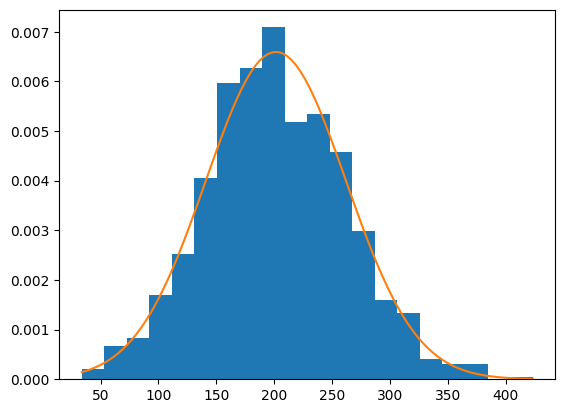

In [10]:
# our density estimate
plt.hist(sample, bins = 20, density=True)
plt.plot(values, probabilities);

/tmp/ipykernel_6159/379804141.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample);


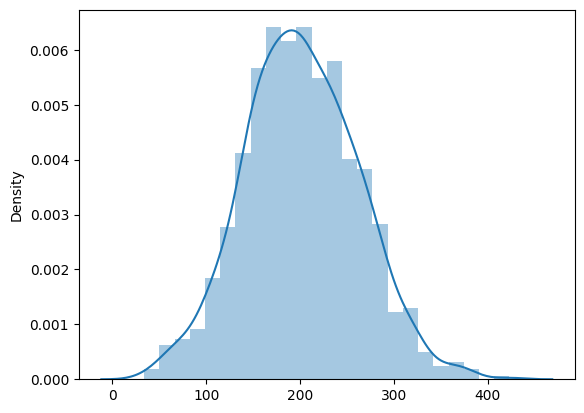

In [11]:
# seaborn's density estimate
sns.distplot(sample);